In [1]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim                             # used to compute the derivative
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import numpy as np
from matplotlib import pyplot as plt

from IPython.display import Markdown

# Tensors

- Used to encode $x$, $y$, and weights ($w's$) 
- Can run on GPUs

### Initialization

In [2]:
# you can initialize directly from an array
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
# you can use a numpy array as well
array = np.array(data)
x_np = torch.from_numpy(array)
x_np

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [5]:
# you can also initialize using other tensors
# by doing so, the new tensor has the same shape and datatype as the original tensor unless specified otherwise
x_ones = torch.ones_like(x_data)
print(x_ones, '\n')

x_rand = torch.rand_like(x_data, dtype = torch.float)
print(x_rand)

tensor([[1, 1],
        [1, 1]]) 

tensor([[0.1406, 0.8552],
        [0.3141, 0.4775]])


In [7]:
# it's possible to use a random or constant value
shape = (2,3,)
rand_tensor = torch.rand(shape)
rand_tensor[0][0] = 0
rand_tensor

tensor([[0.0000, 0.3586, 0.4310],
        [0.1384, 0.0846, 0.7078]])

In [35]:
# requires_grad should be set to False if you want the autgrad to begin recording operations on a tensor
# default is True
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3 * x + 1

# Tensor.grad is None by default
# when backward() is called, the gradients for self are computed 
# more calls to backward() will add gradients into it
y.backward()
print(x.grad)   # gradient of y w.r.t x at x = 2

# y'(2) = 2(x) + 3 = 2(2) + 3 = 7 --> gradient
# if you do backward again for this case, it will give an error

tensor([7.])


### Attributes and Operations

In [8]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [9]:
# to move your tensor to the GPU:
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

In [16]:
# indexing is similar to that of numpy
tensor = torch.rand(4, 4)
print('Original tensor: ', tensor,'\n')
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print('Edited tensor: ',tensor)

Original tensor:  tensor([[0.0868, 0.4915, 0.8799, 0.1764],
        [0.6092, 0.9320, 0.3000, 0.3944],
        [0.2656, 0.9649, 0.7482, 0.0920],
        [0.0698, 0.8458, 0.3846, 0.8687]]) 

First row:  tensor([0.0868, 0.4915, 0.8799, 0.1764])
First column:  tensor([0.0868, 0.6092, 0.2656, 0.0698])
Last column: tensor([0.1764, 0.3944, 0.0920, 0.8687])
Edited tensor:  tensor([[0.0868, 0.0000, 0.8799, 0.1764],
        [0.6092, 0.0000, 0.3000, 0.3944],
        [0.2656, 0.0000, 0.7482, 0.0920],
        [0.0698, 0.0000, 0.3846, 0.8687]])


In [23]:
# you can concatenate tensors
# dim = 1 (hstack aka next to each other) and dim = 0 (vstack aka below the first one)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t2 = torch.vstack([tensor, tensor, tensor])

print('cat: ', t1, '\n')
print('vstack: ', t2, '\n')

cat:  tensor([[0.0868, 0.0000, 0.8799, 0.1764, 0.0868, 0.0000, 0.8799, 0.1764, 0.0868,
         0.0000, 0.8799, 0.1764],
        [0.6092, 0.0000, 0.3000, 0.3944, 0.6092, 0.0000, 0.3000, 0.3944, 0.6092,
         0.0000, 0.3000, 0.3944],
        [0.2656, 0.0000, 0.7482, 0.0920, 0.2656, 0.0000, 0.7482, 0.0920, 0.2656,
         0.0000, 0.7482, 0.0920],
        [0.0698, 0.0000, 0.3846, 0.8687, 0.0698, 0.0000, 0.3846, 0.8687, 0.0698,
         0.0000, 0.3846, 0.8687]]) 

vstack:  tensor([[0.0868, 0.0000, 0.8799, 0.1764],
        [0.6092, 0.0000, 0.3000, 0.3944],
        [0.2656, 0.0000, 0.7482, 0.0920],
        [0.0698, 0.0000, 0.3846, 0.8687],
        [0.0868, 0.0000, 0.8799, 0.1764],
        [0.6092, 0.0000, 0.3000, 0.3944],
        [0.2656, 0.0000, 0.7482, 0.0920],
        [0.0698, 0.0000, 0.3846, 0.8687],
        [0.0868, 0.0000, 0.8799, 0.1764],
        [0.6092, 0.0000, 0.3000, 0.3944],
        [0.2656, 0.0000, 0.7482, 0.0920],
        [0.0698, 0.0000, 0.3846, 0.8687]]) 



In [24]:
# you can do matrix multiplication as:
# method 1
y1 = tensor @ tensor.T
# method 2
y2 = tensor.matmul(tensor.T)
# method 3
y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[0.8129, 0.3864, 0.6976, 0.4978],
        [0.3864, 0.6166, 0.4225, 0.5005],
        [0.6976, 0.4225, 0.6388, 0.3862],
        [0.4978, 0.5005, 0.3862, 0.9074]])

In [27]:
agg = tensor.sum()  # tensor of 1 number/element
agg_item = agg.item()   # item() converts it to a python numerical value
agg_item

4.875492572784424

In [29]:
# to do in place operations (ex: +=, -=), use '_' suffix
print('Original tensor: ', tensor, '\n')
tensor.add_(5)
print('New tensor: ', tensor, '\n')


Original tensor:  tensor([[5.0868, 5.0000, 5.8799, 5.1764],
        [5.6092, 5.0000, 5.3000, 5.3944],
        [5.2656, 5.0000, 5.7482, 5.0920],
        [5.0698, 5.0000, 5.3846, 5.8687]]) 

New tensor:  tensor([[10.0868, 10.0000, 10.8799, 10.1764],
        [10.6092, 10.0000, 10.3000, 10.3944],
        [10.2656, 10.0000, 10.7482, 10.0920],
        [10.0698, 10.0000, 10.3846, 10.8687]]) 



# Perceptron

### Example 1: Simple Perceptron

Example requirements:
- Have 4 inputs and a single output
- Initialize the weights to 1
- Consider a bias term
- Take training points as $x_1 = 5$, $x_2 = -2$, $y=2$
- Use backpropagation 
- Set 𝛼 = 0.1
- Use squared loss function

In [50]:
x = torch.tensor([[5., -2.]])
y = torch.tensor([[2.]])
w = torch.ones((1,2))

h = nn.Linear(2, 1, bias = True)
h.weight = nn.Parameter(w)
h.bias = nn.Parameter(torch.tensor([[1.]]))

optimizer = optim.SGD(h.parameters(), lr = .1)

cost = nn.MSELoss()

optimizer.zero_grad()
out = h(x)
print(f'Forward Pass, h = {h}')
loss = cost(out, y)
loss.backward()
print(f'Backward pass, Derivatives= {h.bias.grad} {h.weight.grad}')
optimizer.step()
print(f'Weights update, w= {h.bias.detach().numpy()} {h.weight.detach().numpy()}')


Forward Pass, h = Linear(in_features=2, out_features=1, bias=True)
Backward pass, Derivatives= tensor([[4.]]) tensor([[20., -8.]])
Weights update, w= [[0.6]] [[-1.   1.8]]


### Example 2: Linear

In [54]:
np.random.seed(22)
x_data = np.sort(-4. + 3. * np.random.rand(30))
y_data = 7. * x_data + np.random.randn(30)

x = torch.tensor(x_data[:,np.newaxis], dtype=torch.float32)
y = torch.tensor(y_data[:,np.newaxis], dtype=torch.float32)

h = nn.Linear(1, 1, bias=True)

optimizer = optim.SGD(h.parameters(), lr = 0.1)
cost = nn.MSELoss()

for i in range(50):
    optimizer.zero_grad()
    out = h(x)
    loss = cost(out, y)
    loss.backward()
    optimizer.step()
    
    print(f'\nEpoch [{i + 1} / {50}]')
    print('=================================')
    print(f'Forward Pass: h = {h} | Backward Pass: Derivatives = {h.bias.grad} {h.weight.grad} | Weights Update: w = {h.bias.detach().numpy()} {h.weight.detach().numpy()}')


Epoch [1 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([32.4420]) tensor([[-88.7105]]) | Weights Update: w = [-3.9369345] [[8.949621]]

Epoch [2 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([-17.1133]) tensor([[44.6997]]) | Weights Update: w = [-2.225605] [[4.4796486]]

Epoch [3 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([8.0101]) tensor([[-22.8955]]) | Weights Update: w = [-3.0266109] [[6.7691946]]

Epoch [4 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([-4.7072]) tensor([[11.3604]]) | Weights Update: w = [-2.5558932] [[5.633152]]

Epoch [5 / 50]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([1.7495]) tensor([[-5.9926]]) | Weights Update: w = [-2.7308419] [[6.232412]

In [56]:
print('h Weight: ', h.weight)
print('h Bias: ', h.bias)

h Weight:  Parameter containing:
tensor([[6.4950]], requires_grad=True)
h Bias:  Parameter containing:
tensor([-1.4227], requires_grad=True)


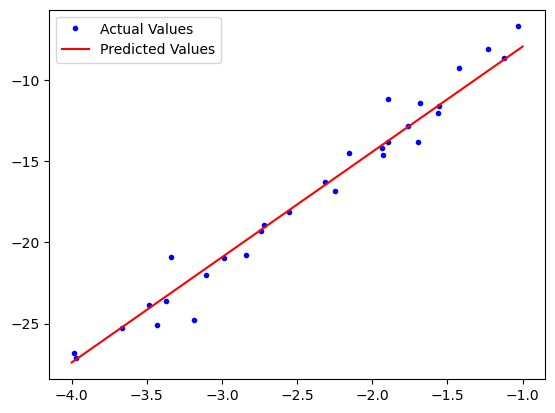

In [60]:
x_new = torch.linspace(-4, -1, 100).view(-1, 1)
y_new = h(x_new)

plt.plot(x_data, y_data, 'b.', label = 'Actual Values')
plt.plot(x_new, y_new.detach().numpy(),'r', label = 'Predicted Values')
plt.legend()

### Example 3: Nonlinear

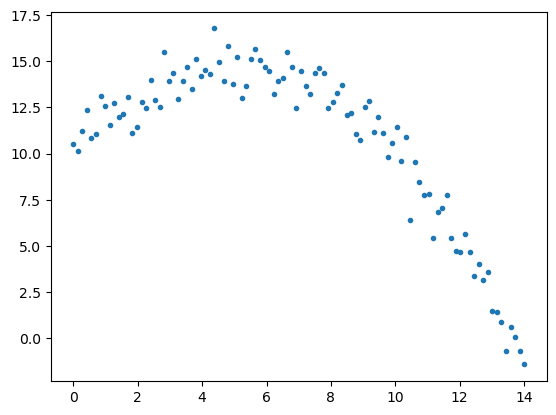

In [82]:
# Generate synthetic data for number of hours spend on video games vs happiness level
np.random.seed(42)
hours = torch.linspace(0, 14, 100).view(-1, 1) # 100 numbers between 0 and 14
happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2
x = hours
y = happiness

plt.plot(x, y, '.')

In [98]:
# TODO
# 2 hidden layers; each will have 6 neurons (for each neuron, we have a bias term), use ReLU for the function g in the hidden layers

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(1, 6, bias=True)
        # self.fc1 = nn.ReLU()
        self.layer2 = nn.Linear(6, 6)
        # self.fc2 = nn.ReLU()
        self.layer3 = nn.Linear(6, 1)

    def forward(self, x):
        # x= self.layer1(x)
        # x= self.fc1(x)
        # x= self.layer2(x)
        # x= self.fc2(x)
        # x= self.layer3(x)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x
    
model = Model()

num_epochs = 10000
optimizer = optim.SGD(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1} / {num_epochs}] -- Loss: {loss.item():.4f}')


Epoch [500 / 10000] -- Loss: 4.9285
Epoch [1000 / 10000] -- Loss: 3.9115
Epoch [1500 / 10000] -- Loss: 3.4974
Epoch [2000 / 10000] -- Loss: 2.8980
Epoch [2500 / 10000] -- Loss: 2.2560
Epoch [3000 / 10000] -- Loss: 1.6926
Epoch [3500 / 10000] -- Loss: 1.5363
Epoch [4000 / 10000] -- Loss: 1.3466
Epoch [4500 / 10000] -- Loss: 1.2837
Epoch [5000 / 10000] -- Loss: 1.2729
Epoch [5500 / 10000] -- Loss: 1.0712
Epoch [6000 / 10000] -- Loss: 1.1377
Epoch [6500 / 10000] -- Loss: 1.0849
Epoch [7000 / 10000] -- Loss: 1.1298
Epoch [7500 / 10000] -- Loss: 0.9622
Epoch [8000 / 10000] -- Loss: 0.9872
Epoch [8500 / 10000] -- Loss: 1.0697
Epoch [9000 / 10000] -- Loss: 1.0305
Epoch [9500 / 10000] -- Loss: 0.9743
Epoch [10000 / 10000] -- Loss: 0.7963


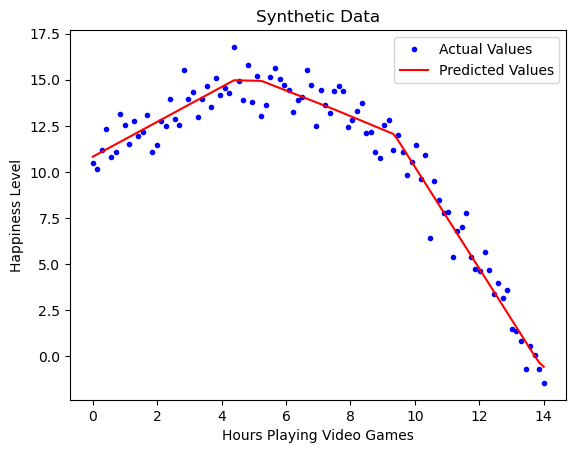

In [99]:
plt.plot(x, y, 'b.', label = 'Actual Values')

out = model.forward(x)
plt.plot(x, out.detach().numpy(), 'r', label = 'Predicted Values')
plt.xlabel('Hours Playing Video Games')
plt.ylabel('Happiness Level')
plt.title('Synthetic Data')
plt.legend()

### Example 4: MNIST

In [102]:
training_data = datasets.MNIST(
    root='~/Downloads/VisionCNN',
    train=True,
    download=True,
    transform=transforms.Compose([
              transforms.ToTensor()])
)                                     # download MNIST dataset, save it in the Downloads folder, we only want to get the training part
                                      # download = True --> download if it doesn't exist
                                      # transforms.ToTensor() --> convert each image in the PIL data type to Tensor
                                      # if you want to apply Gaussian Blur, flip the image, do some data augmentation --> all can be specified here 

# training_data[0] --> first image in the training dataset, prints as a tuple -- PIL image & its ground truth label which is 8 (for e.g.)
# training_data[0][0] --> display the actual image
# Above is assumed without the transforms.ToTensor() part

test_data = datasets.MNIST(
    root='~/Downloads/VisionCNN',
    train=False,
    download=True,
    transform=ToTensor()
)
batchsize = 64
train_dataloader = DataLoader(training_data, batch_size=batchsize, shuffle=True)        # accepts a dataset, specify the batch size, do you want to shuffle, etc.
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

In [103]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()

        self.layer1 = nn.Linear(28*28, 10, bias=True)
        self.prob = nn.LogSoftmax(dim = 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.prob(x)
        return x
    
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

J_history = []
num_epochs=1000
for epoch in range(num_epochs):
    tot_loss = 0

    for i, (inputs, labels) in enumerate(train_dataloader):
        inputs = inputs.reshape(inputs.shape[0], -1)
        optimizer.zero_grad()
        pred = model(inputs)
        loss = criterion(pred, labels)
        loss.backward()
        optimizer.step()
        tot_loss += loss.item()

        if i % 300 == 0:
            print(f'Epoch [{epoch + 1} / {num_epochs}] -- {i + 1} | Loss: {loss.item():.4f}')
    
    J_history += [tot_loss]

Epoch [1 / 1000] -- 1 | Loss: 2.4120
Epoch [1 / 1000] -- 301 | Loss: 2.0682
Epoch [1 / 1000] -- 601 | Loss: 1.7450
Epoch [1 / 1000] -- 901 | Loss: 1.6625
Epoch [2 / 1000] -- 1 | Loss: 1.4902
Epoch [2 / 1000] -- 301 | Loss: 1.4776
Epoch [2 / 1000] -- 601 | Loss: 1.3643
Epoch [2 / 1000] -- 901 | Loss: 1.2044
Epoch [3 / 1000] -- 1 | Loss: 1.2788
Epoch [3 / 1000] -- 301 | Loss: 1.1654
Epoch [3 / 1000] -- 601 | Loss: 1.0370
Epoch [3 / 1000] -- 901 | Loss: 1.0102
Epoch [4 / 1000] -- 1 | Loss: 1.0082
Epoch [4 / 1000] -- 301 | Loss: 1.0387
Epoch [4 / 1000] -- 601 | Loss: 0.8846
Epoch [4 / 1000] -- 901 | Loss: 0.9111
Epoch [5 / 1000] -- 1 | Loss: 0.8702
Epoch [5 / 1000] -- 301 | Loss: 0.9371
Epoch [5 / 1000] -- 601 | Loss: 0.6996
Epoch [5 / 1000] -- 901 | Loss: 0.8036
Epoch [6 / 1000] -- 1 | Loss: 0.7802
Epoch [6 / 1000] -- 301 | Loss: 0.8714
Epoch [6 / 1000] -- 601 | Loss: 0.7468
Epoch [6 / 1000] -- 901 | Loss: 0.7823
Epoch [7 / 1000] -- 1 | Loss: 0.7776
Epoch [7 / 1000] -- 301 | Loss: 0.6493


KeyboardInterrupt: 

In [ ]:
plt.plot(J_history)
plt.title('Convergence Plot of Gradient Descent')
plt.xlabel('Number of Epochs')
plt.ylabel('J')
plt.show()